<center><font size = "10"> Week 6 - Single Cell Electrophysiology<center>
<center><font size = "8">Tutorial 01: Experiments to study the cell<center>

<font size = "3"><font color = "blue"> In this tutorial you will see two types of protocols to study the passive and active properties of an excitable cell.

In [1]:
# This will compile the mechanisms inside the MOD files (and create a new folder x86_64/special).
! nrnivmodl

/Users/wesleymonteith/miniconda3/envs/biophysics/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/usr/bin/xcrun
/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Tutorial_6-20241014
Mod files: "./NaTs2_t.mod" "./SK_E2.mod" "./SKv3_1.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../NaTs2_t.mod
 -> NMODL ../SKv3_1.mod
 -> NMODL ../SK_E2.mod
Translating NaTs2_t.mod into /Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Tutorial_6-20241014/x86_64/NaTs2_t.c
Translating SK_E2.mod into /Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Tutorial_6-20241014/x86_64/SK_E2.c
Translating SKv3_1.mod into /Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Tutorial_6-20241014/x86_64/SKv3_1.c
Thread Safe
Thread Safe
Thread Safe
 -> Compiling SK_E2.c
 -

In [2]:
# Load usefull packages
%matplotlib inline

from neuron import h
import hoc
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm

--No graphics will be displayed.


In [3]:
# Define NEURON class with specific morphology and channel behavior

class NEURON:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()
        
    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input('MorphTestASC.asc')

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        #self.axonal = [] # for the moment we will forget about the axon
        self.all = []
        for sec in h.allsec():
            #print (sec)
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.basal.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            #if 'axon' in sec.name():
            #    self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and the different types
        of ion channels on the soma and dendrites
        """
        # Define passive properties
        # You can try to change the passice properties and see what happens
        for sec in h.allsec():
            sec.Ra = 100
            sec.cm = 1
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
                
        # Define active properties for soma and dendrites (basal and apical)
        for sec in self.somatic:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
          
        for sec in self.apical:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
        
        for sec in self.basal:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1

In [4]:
# Instantiate the cell
Cell = NEURON()


19847 lines read


In [5]:
# As we didn't define all the cell properties, there are some that have defalut values
# We can check those values and check what other mechanisms are in the soma for instance.

Cell.somatic[0].psection()

{'point_processes': {},
 'density_mechs': {'pas': {'g': [3e-05], 'e': [-75.0], 'i': [0.0]},
  'NaTs2_t': {'gNaTs2_tbar': [0.25],
   'ina': [0.0],
   'gNaTs2_t': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'SK_E2': {'gSK_E2bar': [0.01], 'ik': [0.0], 'gSK_E2': [0.0], 'z': [0.0]},
  'SKv3_1': {'gSKv3_1bar': [0.1], 'ik': [0.0], 'gSKv3_1': [0.0], 'm': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]},
  'ca': {'eca': [132.4579341637009],
   'cai': [5e-05],
   'cao': [2.0],
   'ica': [0.0],
   'dica_dv_': [0.0]}},
 'morphology': {'L': 29.024825586459087,
  'diam': [14.140279224972355],
  'pts3d': [(3.9470365047454834, -13.829651832580566, 0.0, 3.6109557151794434),
   (3.7785000801086426, -12.388230323791504, 0.0, 6.478725433349609),
   (3.609963893890381, -10.946807861328125, 0.0, 9.414220809936523),
   (3.441427707672119, -9.50538635253

# 1. Studying cell passive properties: subthreshold stimulation
__SUBTHRESHOLD STIMULATION:__ Sub-threshold (or subthreshold) refers to a stimulus that is too small in magnitude to produce an action potential in excitable cells.

In general, a sub-threshold stimulus leads to the depolarization of the membrane, but the magnitude of the depolarization is not large enough to reach the threshold voltage. Therefore, sub-threshold stimuli do not elicit action potentials.

Using this type of protocols we can study the passive properties of the cell such as the input resistance.

To review the concepts of passive properties you can check again the links in Week 5 tutorials.

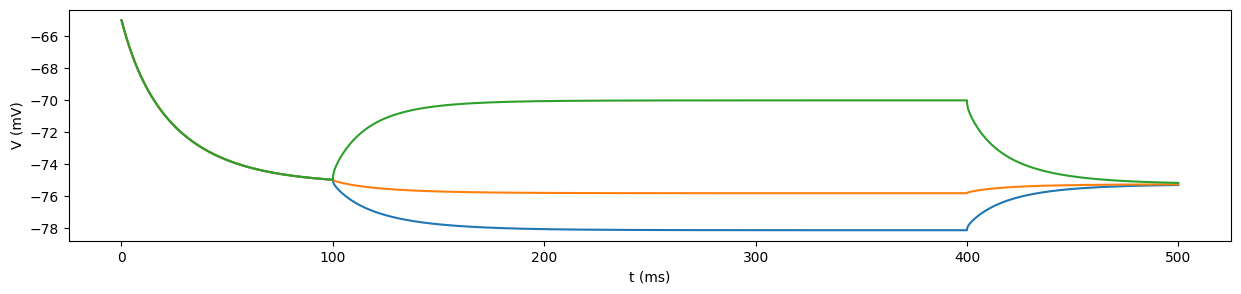

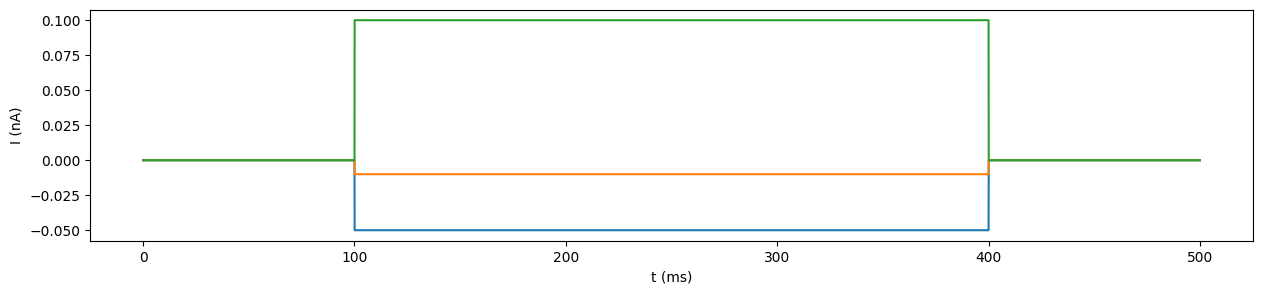

In [6]:
# Inject current steps into the soma
stim_ampl = [- 0.05, - 0.01, 0.1]

# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

### Save the results in, for example a CSV file format

In [7]:
import pandas as pd          # "as" allows us to give a shorthand name to the module
                             # which are usually conventional

list_t = []
list_i = []
list_v = []

# Inject current steps into the soma
stim_ampl = [- 0.05, - 0.01, 0.1]

# Stimulation
for sa in stim_ampl: 
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)
        
    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    list_t.append(list(rec_t))
    list_i.append(list(rec_i))
    list_v.append(list(rec_v_soma))

df = pd.DataFrame([list_t, list_i, list_v])
# save dataframe in csv file
df.to_csv('Subthreshold_test.csv')

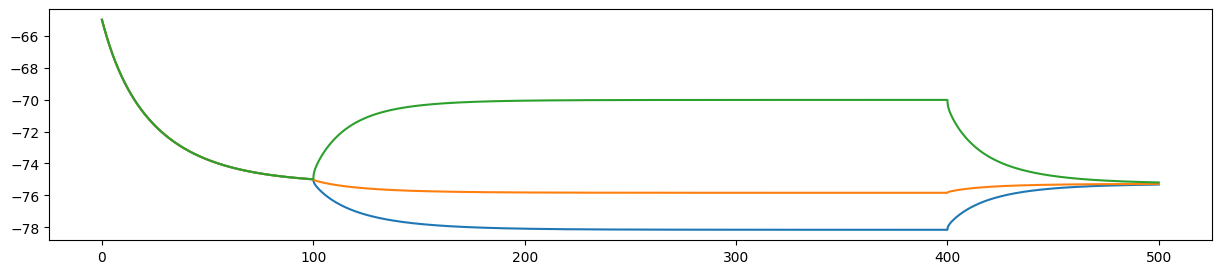

In [8]:
#If I want to read it
# import pandas as pd

pd.read_csv('Subthreshold_test.csv') 

#print (df.head(1))
time0 = df.loc[0,0]
volt0 = df.loc[2,0]

time1 = df.loc[0,1]
volt1 = df.loc[2,1]

time2 = df.loc[0,2]
volt2 = df.loc[2,2]

plt.figure(figsize=(15,3))
plt.plot(time0, volt0)
plt.plot(time1, volt1)
plt.plot(time2, volt2);

# 2. Studying cell active properties: suprathreshold stimulation

__SUPRATHRESHOLD STIMULATION:__ Supra-threshold (or suprathreshold) refers to a stimulus that is big enough in magnitude to produce an action potential in excitable cells.

Using this type of protocols we can study the active properties of the cell such as the amplitude or the shape of the action potential.

To review the concepts of active properties you can check again the links in Week 5 tutorials.

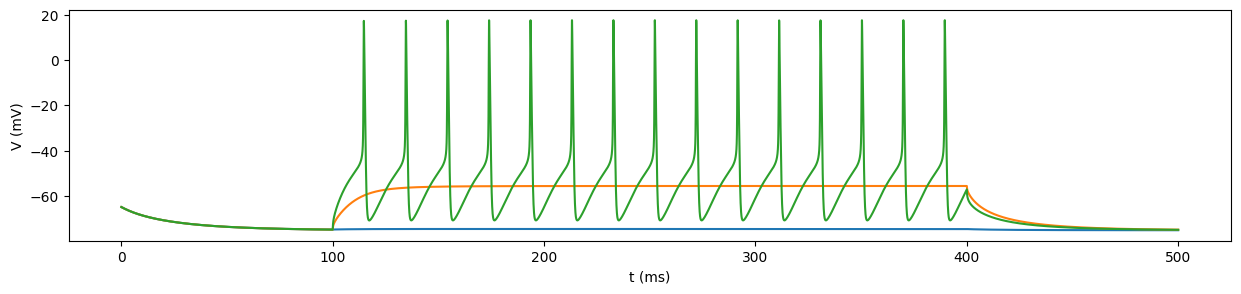

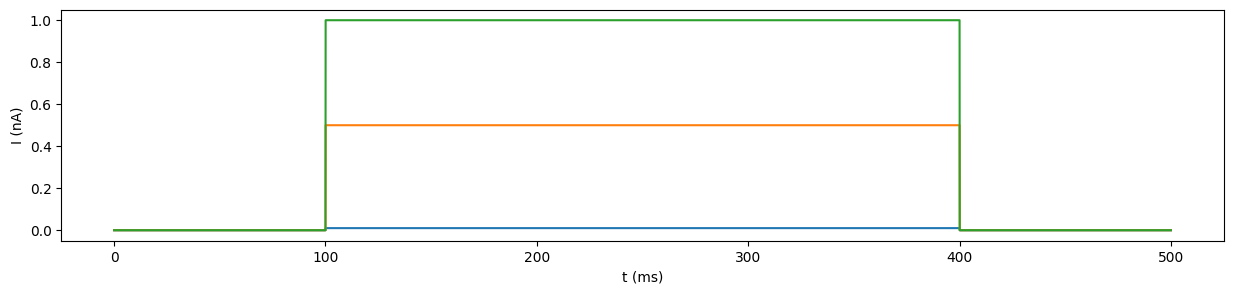

In [9]:
# Inject current steps into the soma
stim_ampl = [0.01, 0.5, 1.0]

# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)